In [4]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set()
%matplotlib inline

In [5]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [6]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [7]:
# Clean up
# Rename columns
df.columns = ['Month','Milk in Pounds per Cow']

In [8]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [11]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [10]:
# Drop the trailing line 168
df.drop(168,axis=0,inplace=True)

In [18]:
# Convert Month to be a datetime index 
# First convert Month to a date-time type
df['Month'] = pd.to_datetime(df['Month'])
# Now create a datetime index from it
df.set_index('Month', inplace=True)

In [20]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


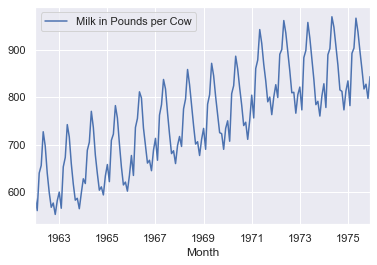

In [22]:
# What does the data look like
df.plot()

In [24]:
# Create series
time_series = df['Milk in Pounds per Cow']
type(time_series)

pandas.core.series.Series

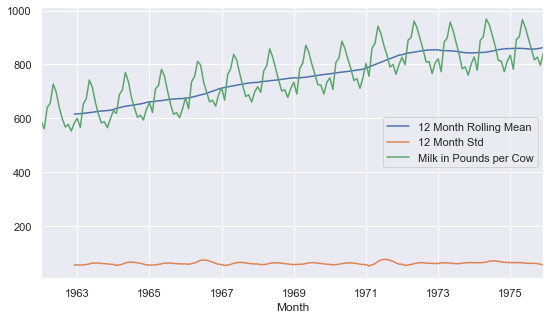

In [30]:
# 12 month rolling average
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean',figsize=(9,5))
time_series.rolling(12).std().plot(label='12 Month Std')
time_series.plot(label="Milk in Pounds per Cow")
plt.legend()

# Its a good sign that the dataset is workable if the Std deviation is relatively
# flat in comparison to the main dataset

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

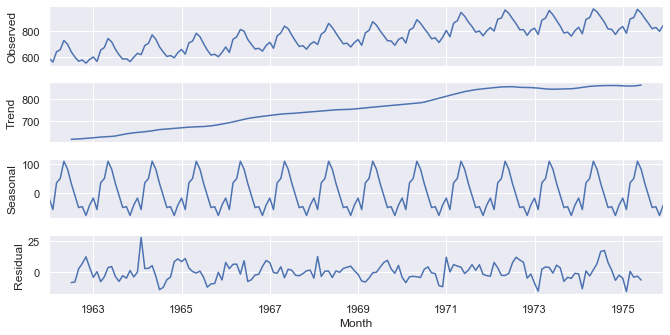

In [55]:
decomp = seasonal_decompose(time_series,freq=12)
fig = decomp.plot()
fig.set_size_inches(10,5)

In [57]:
# Using Mathmatical techniques to tell if the data is stationary, such as the Augmented Dicky Fuller Unit Root test
# (Eyeballing the chart, we can see that its not stationary)
# A small p value < 0.05 returned gives strong evidence that the data is stationary

from statsmodels.tsa.stattools import adfuller


In [59]:
result = adfuller(df['Milk in Pounds per Cow'])
result

(-1.3038115874221294,
 0.6274267086030316,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [62]:
def adf_check(time_series):
    result = adfuller(time_series)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Observations used']

    # Can this be rewritten more efficiently and used as a dictionary?
    for value, label in zip(result, labels):
        print(f"{label}: {str(value)}")
    
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root, it is non-stationary")


In [63]:
adf_check(df['Milk in Pounds per Cow'])

Augmented Dicky-Fuller Test
ADF Test Statistic: -1.3038115874221294
p-value: 0.6274267086030316
# of lags: 13
Num of Observations used: 154
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root, it is non-stationary


In [ ]:
# As its non stationary